Disaster Tweet Classification.........

# Exploratory Data Analysis


In [1]:
# importing important libs
import pandas as pd
import numpy as np
from random import shuffle
import random

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 


import re
import os
from tqdm.notebook import tqdm
from collections import Counter


import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
# Loading the data
tweet = pd.read_csv("train.csv")

In [3]:
tweet.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


The id column is an unique identifier for each tweet, we are going to drop it.

In [4]:
# dropping the id column
tweet.drop(["id"], axis = 1, inplace = True)

In [5]:
# shape of the data
tweet.shape

(7613, 4)

In [6]:
tweet.isna().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

<Axes: xlabel='target'>

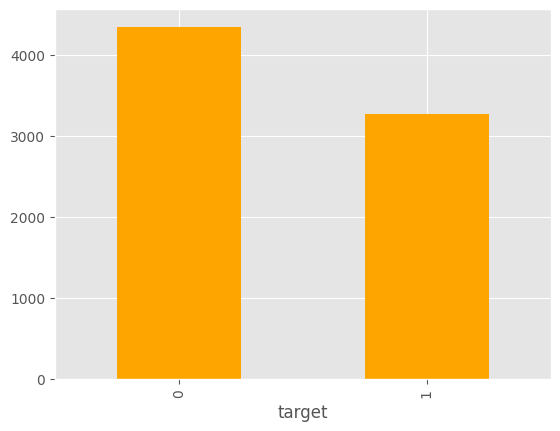

In [7]:
# our data is slightly imbalanced
# 1 represents the tweet is about real disaster
# 0 means normal tweet
# cf.set_config_file(theme="ggplot") # Set themes
tweet.target.value_counts().plot(kind = "bar", color = "orange")

## Analysis of the "text" column

In [8]:
# this function will print random texts from the data
def print_random(data=None, count=5):
    done = []
    index = np.random.randint(low=0, high=tweet.shape[0])
    for i in range(0, count+1):
        index = np.random.randint(low=0, high=tweet.shape[0])
        if index not in done:
            print(data["text"].iloc[index])
            print("class: {}".format(data["target"].iloc[index]))
            print(70*"=")
            print("\n")
        else:
            data.append(index)

In [9]:
# printing 10 tweets
print_random(data=tweet, count=15)

President Barack Obama has on air meltdown over opposition to Iran nuclear deal http://t.co/c0t7RvoTKj via @examinercom
class: 1


Tell the United Nations: Plantations are NOT forests! https://t.co/cic7h64Qv8 via @RainforestResq
class: 0


Earthquake and tsunami that occurred in Japan 'free speech' is also swallowed. http://t.co/TJyyFT6NV0
class: 1


#NYC #News Legionnaires death toll rises to 8 in New York City: All eight fatalities were of older adults with... http://t.co/IQJ1Z3jXx8
class: 1


Ahrar Al Sham: In our negotiations with Iran over Al Zabadani they wanted all Sunnis evacuated out of Al Zabadani!
class: 0


@KabarMesir @badr58 
Never dies a big Crime like RABAA MASSACRE as long the revolution is being observed.
#rememberRABAA
class: 1


Disillusioned lead character 
Check
Happy go lucky free spirit girl
Check
Dream life crushed
Check
Great music
Check
All Crowe tropes intact
class: 0


Leader of #Zionism STOP BURNING #Babies  https://t.co/6xYsDN2Xz0
class: 1


suddenly it's

In [10]:
print_random(data=tweet, count=5)

Given the US coalition's fondness for backing '1984'-style totalitarianism it's a surprise they haven't copied... http://t.co/58wvChg1M9
class: 0


Chick masturbates a guy until she gets exploded on her face &gt; http://t.co/5QhoeHE9hf
class: 1


The people who tweet and care about #Japan #Fukushima nuclear disaster are not the problem those who ignore are the problem.
class: 1


AmazonDeals: Skylanders Trap Team: Flip Wreck Character Pack - down 4.53% ($0.45) to $9.49 from $9.94 #Sale http://t.co/pMbuzfGIn3
class: 0


Exploration takes seismic shift in Gabon to Somalia - WorldOil (subscription) http://t.co/kqVEVuutDJ #??????? #Somalia
class: 0


Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute http://t.co/BB7TTdVJWE
class: 1




**Some of the tweets contains usernames of other twitter accounts user names, links, integers, hashtags etc. It is important to note that the hashtag can give us lot of information regarding the tweet**

In [11]:
dis_words = " ".join(tweet[tweet["target"] == 1]["text"])
dis_count = Counter(dis_words.split())

norm_words = " ".join(tweet[tweet["target"] == 0]["text"])
norm_count = Counter(norm_words.split())

In [12]:
# most occured words in normal tweets
norm_count.most_common(40)

[('the', 1524),
 ('a', 1115),
 ('to', 1099),
 ('I', 938),
 ('and', 840),
 ('of', 834),
 ('in', 720),
 ('you', 529),
 ('is', 512),
 ('for', 452),
 ('my', 442),
 ('on', 387),
 ('-', 374),
 ('with', 349),
 ('that', 326),
 ('The', 295),
 ('it', 290),
 ('be', 268),
 ('like', 233),
 ('this', 225),
 ('by', 225),
 ('have', 219),
 ('at', 212),
 ('was', 205),
 ('your', 201),
 ('me', 195),
 ('are', 195),
 ('just', 193),
 ('so', 190),
 ('&amp;', 190),
 ("I'm", 185),
 ('??', 183),
 ('but', 177),
 ('out', 172),
 ('up', 167),
 ('from', 166),
 ('not', 162),
 ('will', 146),
 ('as', 143),
 ('get', 142)]

In [13]:
# most occured words in dis tweets
dis_count.most_common(40)

[('the', 1051),
 ('in', 1037),
 ('of', 888),
 ('a', 730),
 ('to', 706),
 ('and', 462),
 ('-', 389),
 ('on', 386),
 ('for', 368),
 ('is', 302),
 ('at', 273),
 ('I', 259),
 ('The', 257),
 ('by', 244),
 ('from', 206),
 ('A', 167),
 ('that', 166),
 ('with', 159),
 ('was', 158),
 ('are', 150),
 ('it', 143),
 ('after', 140),
 ('as', 139),
 ('have', 134),
 ('via', 115),
 ('this', 110),
 ('fire', 108),
 ('my', 107),
 ('over', 107),
 ('...', 106),
 ('&amp;', 105),
 ('you', 103),
 ('be', 103),
 ('has', 98),
 ('been', 93),
 ('In', 90),
 ('who', 89),
 ('California', 86),
 ('killed', 86),
 ('like', 85)]

In [14]:
def show_viz(count=50, target=None):
    lst = []
    if target == "normal":
        for w, n in norm_count.most_common(count):
            lst.append([w,n])
        df = pd.DataFrame(data=lst)
        df.columns = ["word", "count"]
        df.plot(kind="bar",
                 x="word",
                 y="count",
                 title=f"{count} Most common words in {target} tweets",
                figsize=(12,8),
               color = list('rgbkymc'),)
        plt.xlabel('Words')
        plt.ylabel("Count") 

        
    elif target == "disaster":
        for w, n in dis_count.most_common(count):
            lst.append([w,n])
        df = pd.DataFrame(data=lst)
    
        df.columns = ["word", "count"]
        df.plot(kind="bar",
                 x="word",
                 y="count",
                 title=f"{count} Most common words in {target} tweets",
               figsize=(12,8),
               color = list('rgbkymc'),)
        plt.xlabel('Words')
        plt.ylabel("Count") 
        

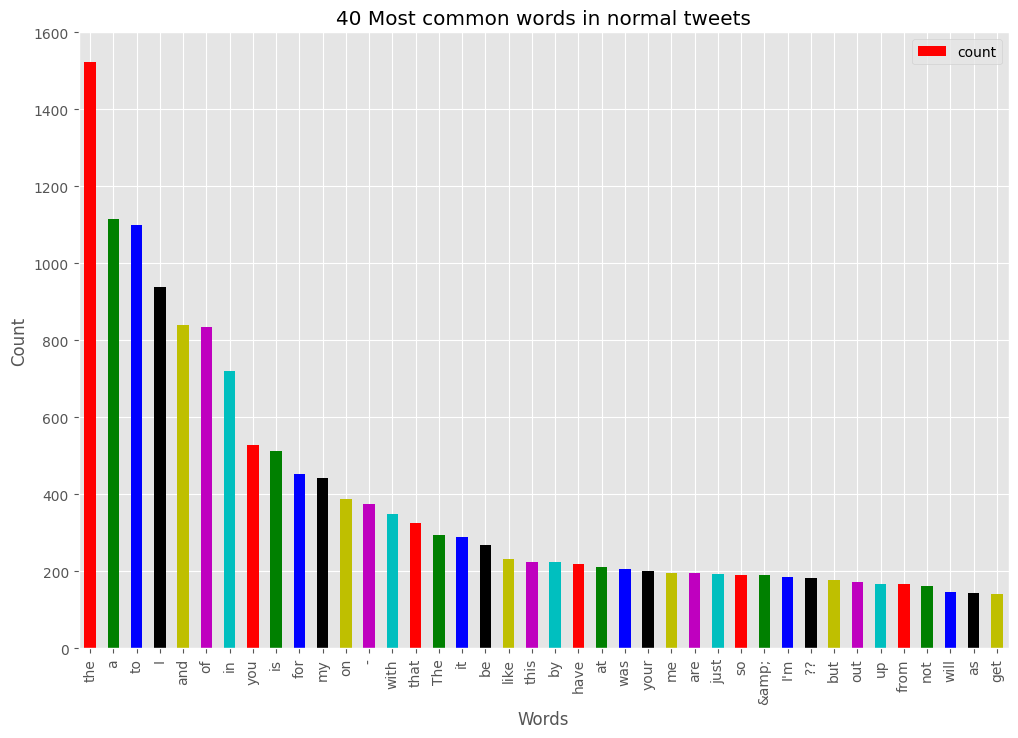

In [15]:
# 50 most appeared words in normal tweets
show_viz(target="normal", count=40)

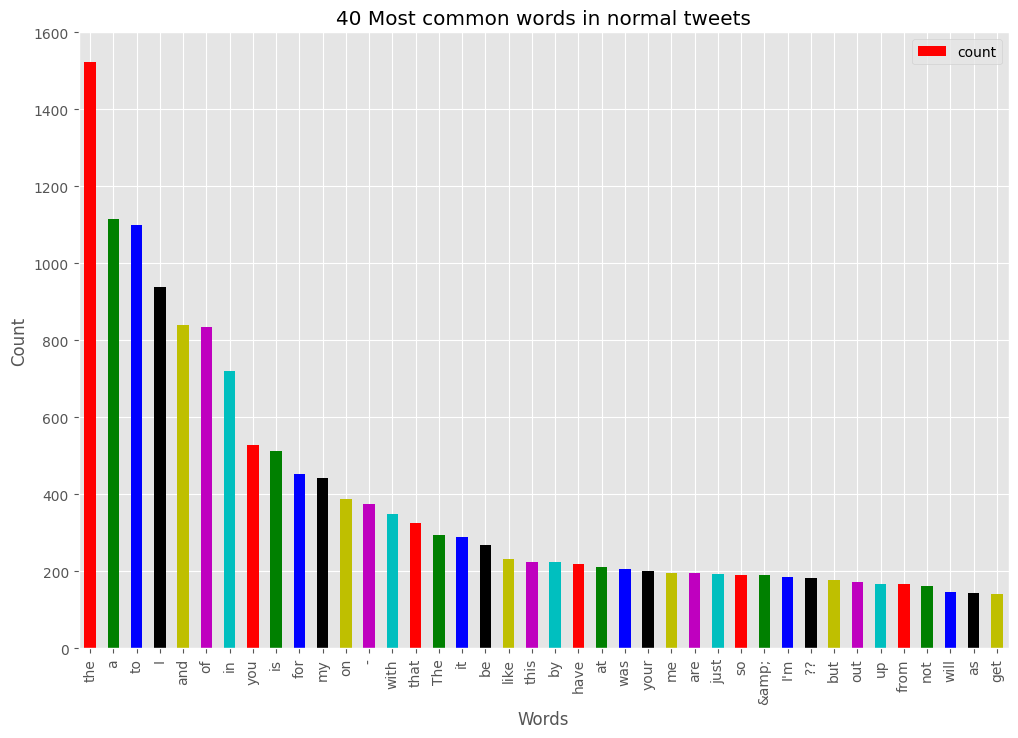

In [16]:
# 100 most appeared tweets in normal tweets
show_viz(target="normal", count=40)

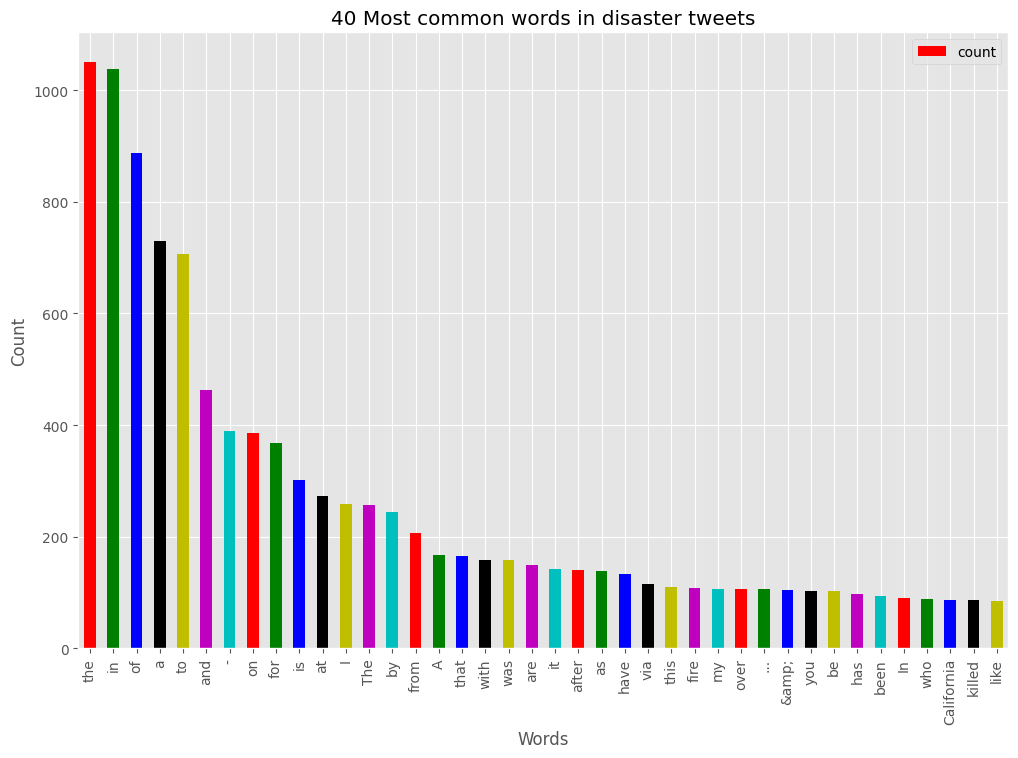

In [17]:
# 50 most appeared words in disaster tweets
show_viz(target="disaster", count=40)

The above visualizations can give us a lot of insight regarding our data but it can be misleading as well as we have not preprocessed our data. We have a bunch of stopwords in our data. So, now
lets make a wordcloud where we will ignore the stop words and visualize the "text" column.

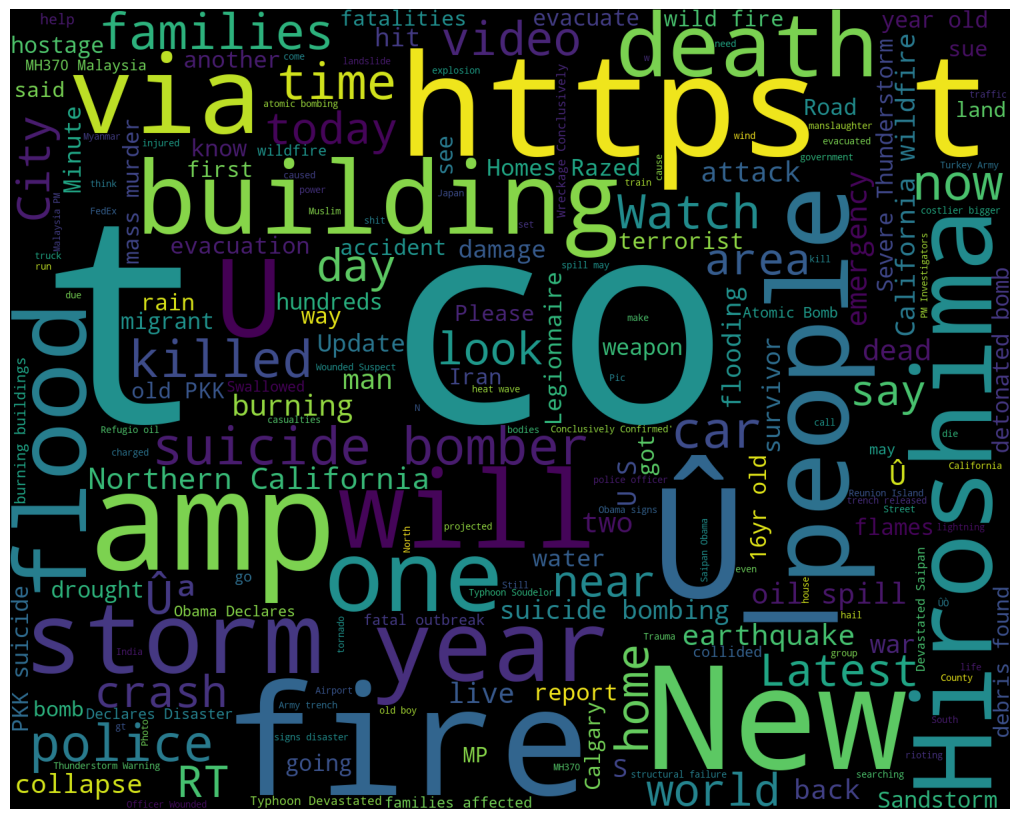

In [18]:
# We want to not see the stop words at all
stopwords = set(STOPWORDS) 

# Plotting the word cloud od disaster tweets
wordcloud = WordCloud(width = 1500, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(dis_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

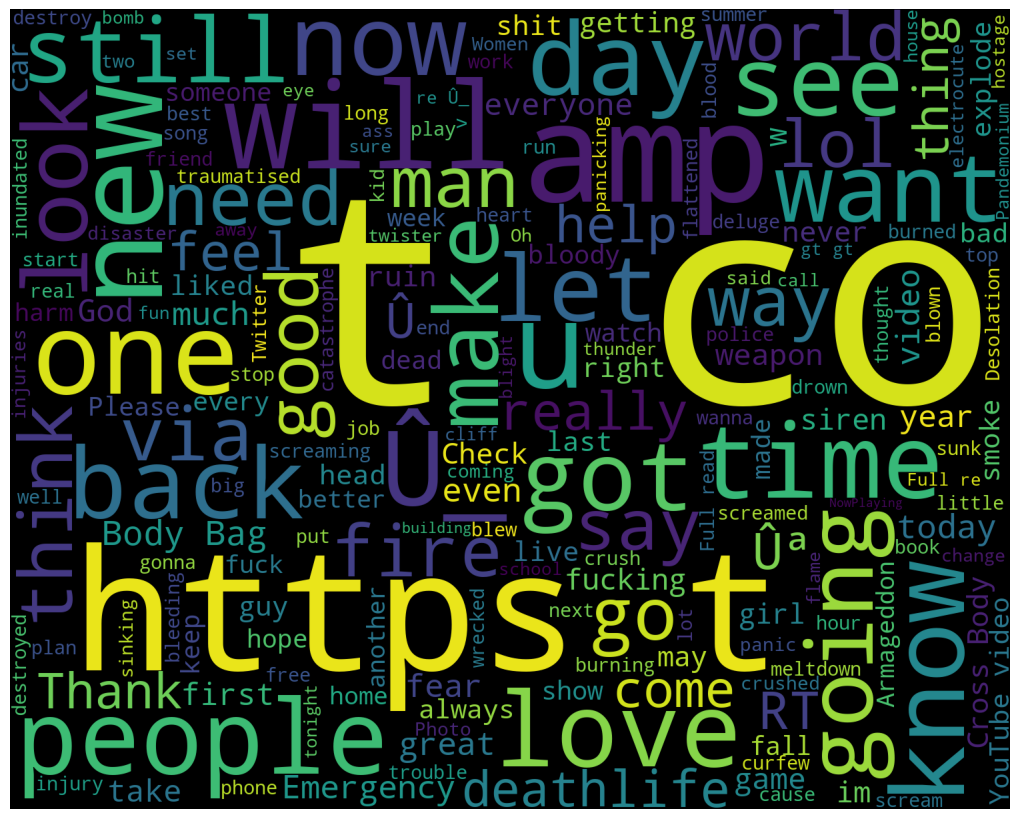

In [19]:
# We want to not see the stop words at all
stopwords = set(STOPWORDS) 

# Plotting the word cloud od disaster tweets
wordcloud = WordCloud(width = 1500, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(norm_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

 We can conclude that the tweets contains a lot of links of other websites and that can be useful for our model.

## Analysis of the "location" column

In [20]:
tweet.head(5)

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [21]:
# Total NAN values
tweet["location"].isna().sum()

2533

In [22]:
total_con = len(tweet.location.value_counts())
print(f"There is all total {total_con} number of unique countries available.")

There is all total 3341 number of unique countries available.


In [23]:
# This function will help us to visualize the hotspots
normal_tweet_location = tweet[tweet["target"] == 0][["location", "target"]]["location"].value_counts(dropna = False)
disaster_tweet_location = tweet[tweet["target"] == 1][["location", "target"]]["location"].value_counts(dropna = False)


In [24]:
# From series to dataframe
normal_tweet_location_df = normal_tweet_location.to_frame().reset_index()
normal_tweet_location_df.columns = ["country", "count"]
disaster_tweet_location_df = disaster_tweet_location.to_frame().reset_index()
disaster_tweet_location_df.columns = ["country", "count"]


In [25]:
normal_tweet_location_df = normal_tweet_location_df.sort_values(by = ["count"],
                                                                ascending = False,
                                                                kind='quicksort',
                                                                na_position='last')

disaster_tweet_location_df = disaster_tweet_location_df.sort_values(by = ["count"],
                                                                ascending = False,
                                                                kind='quicksort',
                                                                na_position='last')

In [26]:
normal_tweet_location_df.head(5)

,country,count
0,NaN,1458
1,New York,55
2,USA,37
3,London,29
4,United States,23


In [27]:
disaster_tweet_location_df.head(5)

,country,count
0,NaN,1075
1,USA,67
2,United States,27
3,Nigeria,22
4,India,20


In [28]:
# The below function helps us to visualize the country column in threshold of occurence

def location_viz(low = 0, high = 50, target = None):
    if target == "normal":
        count_dataframe = normal_tweet_location_df[normal_tweet_location_df["count"].apply(lambda x: high >= x >=low)]
        
        
        count_dataframe.plot(kind = "bar",
        x = "country",
        y = "count",
        color="blue",
        title=f"Range: {high}-{low}, {target} Tweets",
        figsize = (12, 8),
        )
        plt.xlabel("Country")
        plt.ylabel("Count")
                                                                            
    elif target == "disaster":
        count_dataframe = disaster_tweet_location_df[disaster_tweet_location_df["count"].apply(lambda x: high >=x >=low)]
        
        
        count_dataframe.plot(kind = "bar",
        x = "country",
        y = "count",
        color="red",
        title=f"Range: {high}-{low}, {target} Tweets",
                            figsize = (12, 8),)
        plt.xlabel("Country")
        plt.ylabel("Count")

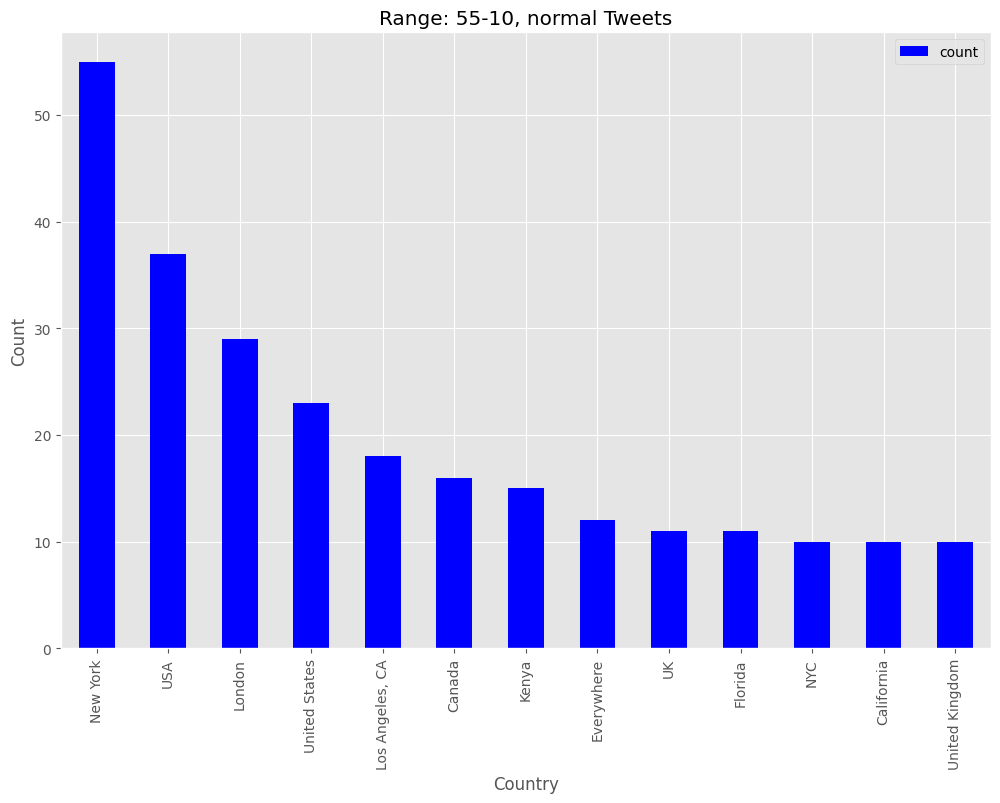

In [29]:
location_viz(low = 10, high = 55, target="normal");

As we can see above, in normal tweets the most common countries are the above. Also, it is very important to note that we have all total 1458 NAN values in normal tweets.

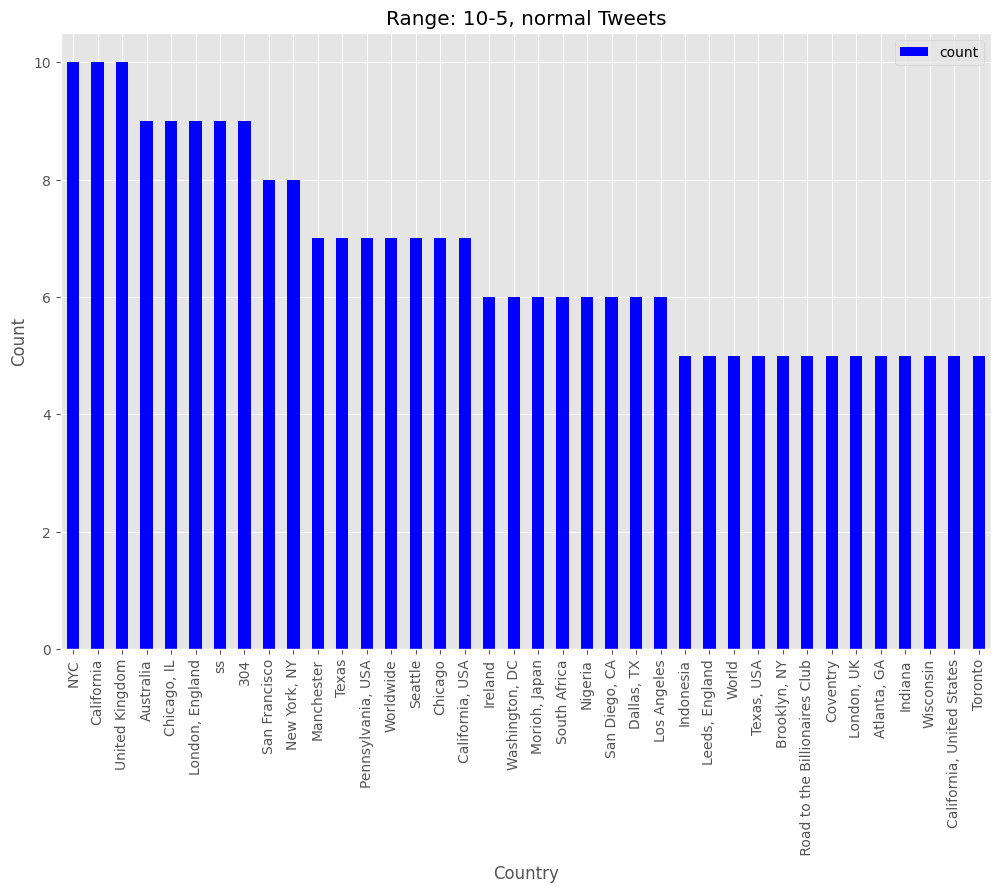

In [30]:
location_viz(low = 5, high = 10, target="normal");

The above are the countries that occures 10 to 5 times in normal tweets. We can simply see the count by just hovering over the plot.

The above plot tells us that there are many countries that occures 1 to 5 times in normal tweets. That tells us that
if we perform one hot encoding over the country column, we can easily run into **curse of dimensionality** problem. We need to clean the location column as well. 

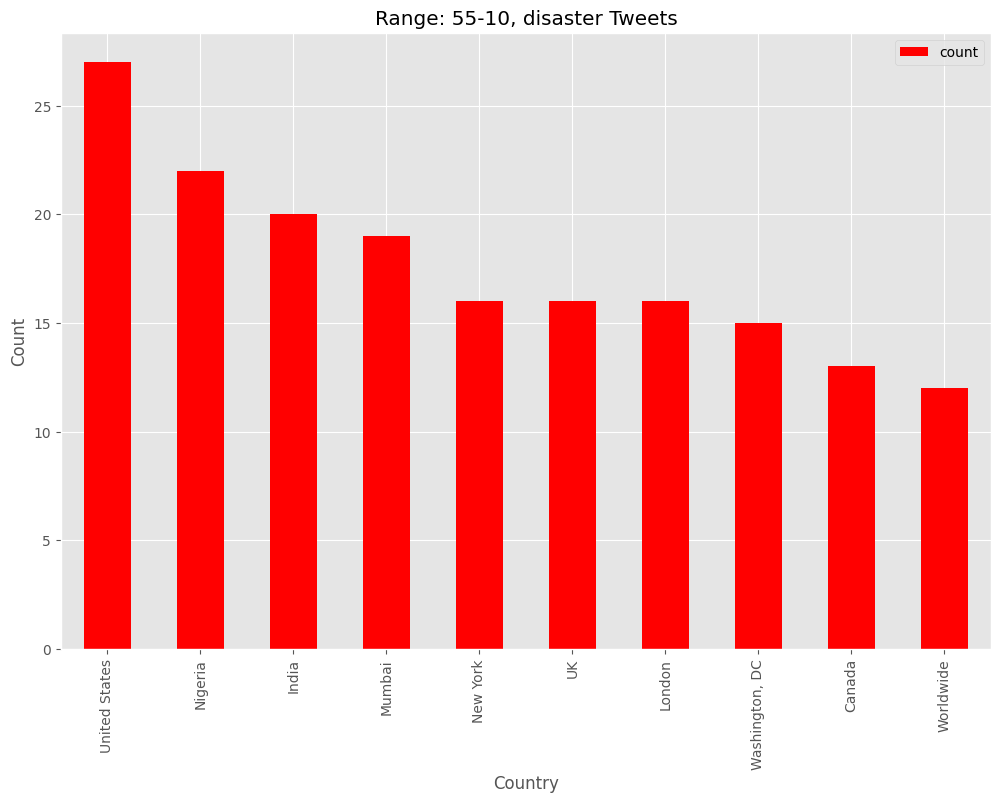

In [31]:
location_viz(low = 10, high = 55, target="disaster");

The above plot shows the most frequent countries that occures in disaster tweets. Here we can see **United States** occures 27 times.

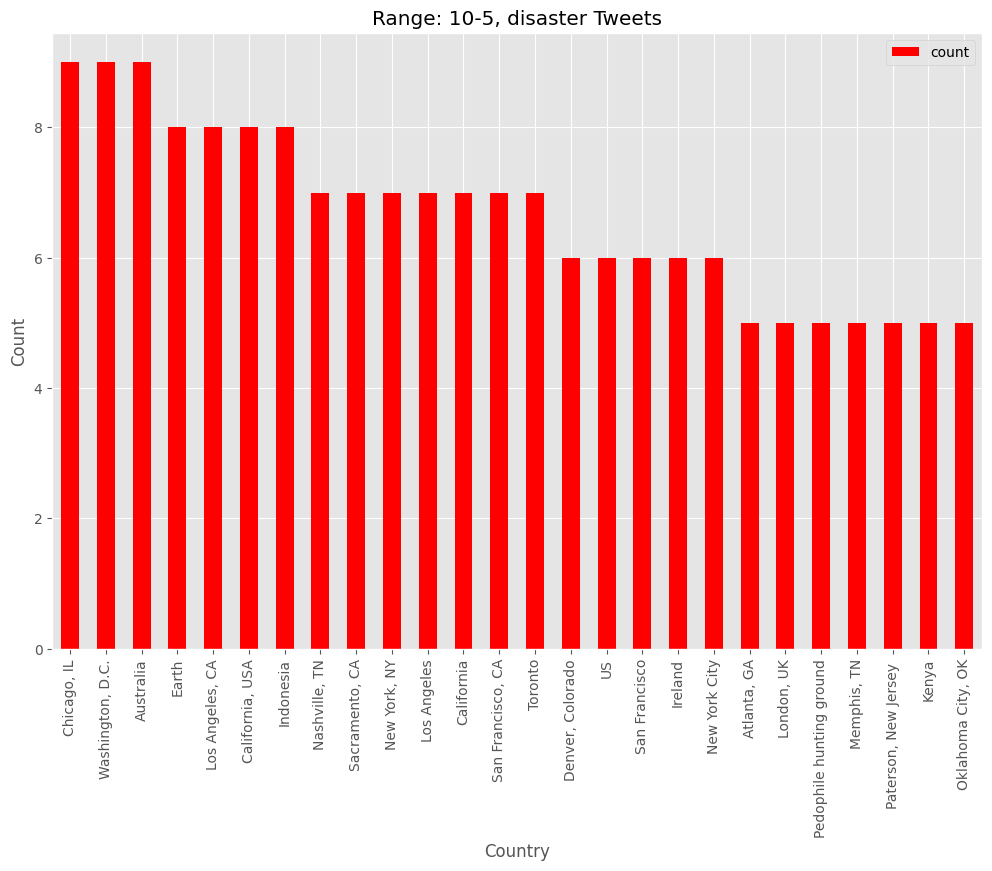

In [32]:
location_viz(low = 5, high = 10, target="disaster");

The above plot shows the most frequent countries in Dis tweets, they occure 10 to 5 times.

There are too many countries that has count in between 5 to 1. **Memphis, TN** occures 5 times.

## Analysis of the "Keyword" column

In [33]:
tweet.head(5)

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [34]:
total = tweet["keyword"].isnull().sum()
print(f"There are all total {total} NAN values available in keyword column")

There are all total 61 NAN values available in keyword column


In [35]:
normal_tweet_kw = tweet[tweet.target == 0][["keyword"]]
normal_tweet_kw = normal_tweet_kw.keyword.value_counts(dropna = False).to_frame().reset_index()
normal_tweet_kw.columns = ["keyword", "count"]


disaster_tweet_kw = tweet[tweet.target == 1][["keyword"]]
disaster_tweet_kw = disaster_tweet_kw.keyword.value_counts(dropna = False).to_frame().reset_index()
disaster_tweet_kw.columns = ["keyword", "count"]

In [36]:
normal_tweet_kw.head(5)

,keyword,count
0,body%20bags,40
1,harm,37
2,armageddon,37
3,deluge,36
4,ruin,36


In [37]:
disaster_tweet_kw.head(5)

,keyword,count
0,NaN,42
1,wreckage,39
2,outbreak,39
3,derailment,39
4,typhoon,37


In [38]:
normal_tweet_lkw = normal_tweet_kw.sort_values(by = ["count"],
                                                    ascending = False,
                                                    kind='quicksort',
                                                    na_position='last')


disaster_tweet_lkw = disaster_tweet_kw.sort_values(by = ["count"],
                                                    ascending = False,
                                                    kind='quicksort',
                                                    na_position='last')

<Axes: xlabel='keyword'>

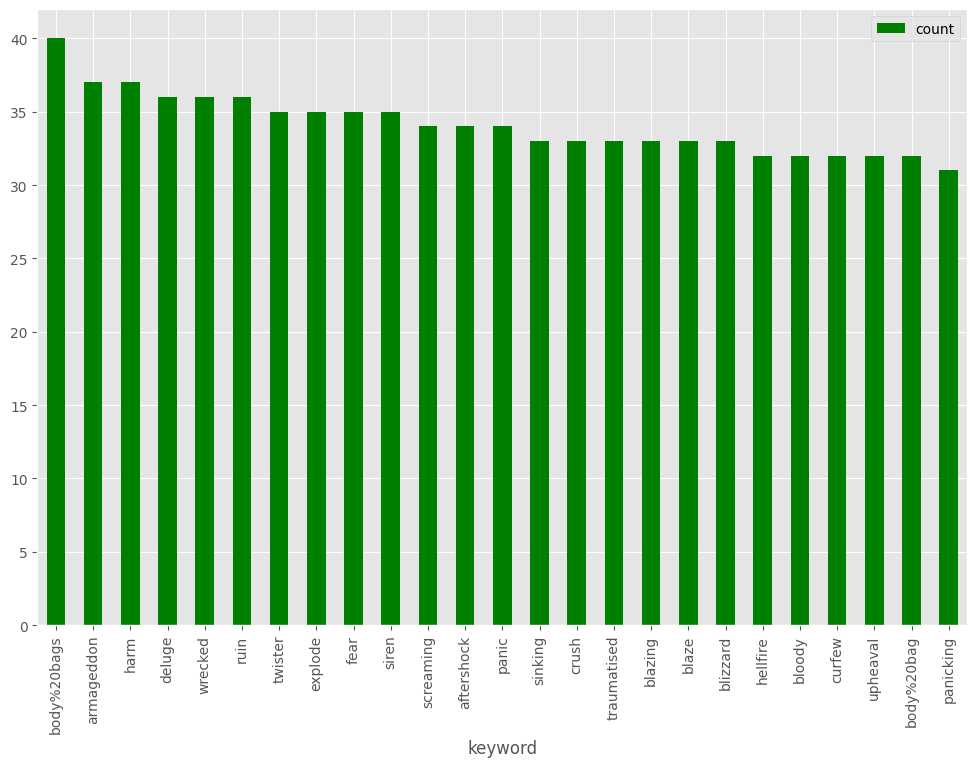

In [39]:
normal_tweet_lkw.head(25).plot(kind = "bar",
                       x = "keyword", 
                       y = "count",  
                       color = "green",
                     figsize = (12, 8))

<Axes: xlabel='keyword'>

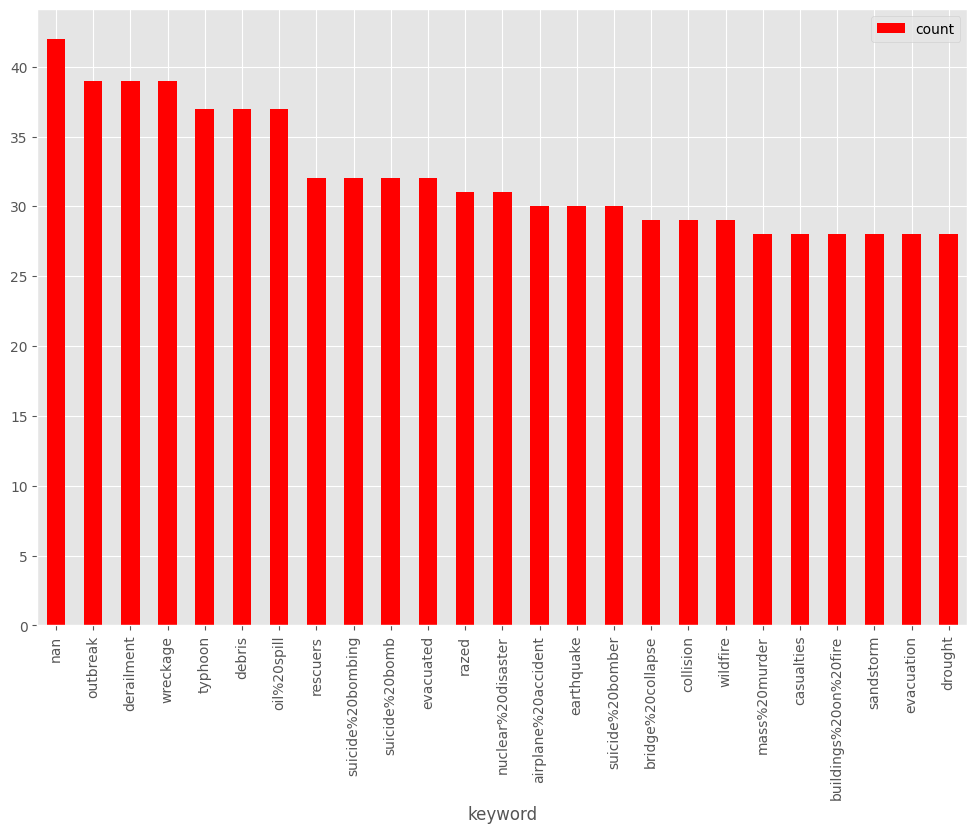

In [40]:
disaster_tweet_lkw.head(25).plot(kind = "bar",
                         x = "keyword",
                         y = "count",
                         color = "red",
                                figsize = (12, 8))

# Data Cleaning and Preprocessing

First and foremost we have to clean the text column of the dataframe. We must remove noise from our text data.

In [41]:
tweet.head(5)

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [42]:
print_random(data=tweet, count=5)

Stretcher brought out for Vampiro. Cut to commercial isn't a good sign. #UltimaLucha #LuchaUnderground
class: 0


Bloody Mary in the sink. Beet juice http://t.co/LUigmHMa1i
class: 0


Eating takis then rubbing my eyes with my hands now my eyes are bleeding tears
class: 0


@Demolition_d best grill u fkn pleb
class: 0


On the eve of Jon Stewart leaving The Daily Show WMATA has honored him by letting another train get derailed and crippling the service.
class: 1


That's the ultimate road to destruction
class: 0




In [43]:
# Tqdm just gives us the status bar
from tqdm.notebook import tqdm
# Imporing Porter Stemmer
from nltk.stem import PorterStemmer 
count = 0
# Initializing the stemmer
ps = PorterStemmer()

# Stopwords
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"prolly", "probably", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", " ", phrase) # removes usernames
    phrase = re.sub(r"^(\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]\d{3}[\s.-]\d{4}$", " ", phrase)  # removes phone numbers
    return phrase

for sentance in tqdm(tweet['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(ps.stem(e.lower()) for e in sentance.split() if e.lower() not in stopwords)
    sentance.replace("#", "").replace("_", " ")
    tweet["text"][count] = sentance.strip()
    count += 1

  0%|          | 0/7613 [00:00<?, ?it/s]

In [44]:
# printing some tweets after cleaning and stemming
print_random(data = tweet, count = 15)

death forev rep jet
class: 1


would cri nuclear reactor cool tank winechat
class: 0


la time refugio oil spill may costlier bigger project
class: 1


heard love love heat wave vol georg deejayempiresound soundcloud np
class: 0


joel book act
class: 0


bodi shop inund car dent hail good news insur pay bad news stuck deduct wcvb
class: 1


picthi thank much toronto whirlwind amazing glad final
class: 0


crime kill displac million systemat tortur carri look grahamwp fire gun arrest
class: 1


wow alright sansa shook head blink rapidli new inform sunk realli not know
class: 0


ruin everyth
class: 0


remov linkuri browser hijack
class: 1


pleas blizzard love
class: 0


ye appar report cow fatal well sadli
class: 1


earthquak ssw anza california iphon user download earthquak app inform
class: 1


illinoi emerg unit simul chemic explos nu via hazmat
class: 1


estim damag fatal hiroshima size atom bomb drop hometown
class: 1




In [45]:
print_random(data = tweet, count = 20)

stretcher min speaker deck
class: 0


resid central part ocean citi heard engin flood mitig option tuesday ocnj
class: 1


famili sue legionnair famili affect fatal outbreak legionnair disea
class: 1


lotg smooth blue bird moth caught let go chalk mous massacr subtl disney diss
class: 0


ethiopian regim continu receiv foreign aid famin struck year eastern ethiopia
class: 1


gm pray attack enemi derail ur destini block lord amp flood ur life w heavenli bless
class: 0


understand umntu wakho trust partner ok u know not fear anyth
class: 0


god forbid anyon famili know answer phone need new emerg contact
class: 0


believ not much rain newli plant mapl tree actual drown
class: 1


latest home raze northern california wildfir
class: 1


shot heart xv go total give love bad name heart pierc
class: 0


well journey get home train collid cow track
class: 1


ginga think defeat not l drago destroy not
class: 0


irand cover nuclear activ bioterror iran broken least agreement
class: 1


wr

In [46]:
tweet.tail(5)

,keyword,location,text,target
7608,NaN,NaN,two giant crane hold bridg collaps nearbi home,1
7609,NaN,NaN,control wild fire california even northern par...,1
7610,NaN,NaN,volcano hawaii,1
7611,NaN,NaN,polic investig e bike collid car littl portug ...,1
7612,NaN,NaN,latest home raze northern california wildfir a...,1


# Feature Engineering and Dimensionality Reduction

Now, we will perform feature engineering then we will apply some dimensionality reduction techniques.

In [47]:
tweet.head(5)

,keyword,location,text,target
0,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,NaN,NaN,forest fire near la rong sask canada,1
2,NaN,NaN,resid ask ishelt place notifi offic no evacu s...,1
3,NaN,NaN,peopl receiv wildfir evacu order california,1
4,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1


In [48]:
location_count = tweet["location"].value_counts().to_dict()

keyword_count = tweet["keyword"].value_counts().to_dict()

In [49]:
# Here we are counting nan values as 0 and we are replacing by count or frequency
count = 0
for k in tweet["keyword"]:
    if k is str:
        tweet["keyword"][count] = keyword_count[k]
    else:
        tweet["keyword"][count] = 0
    count += 1

In [50]:
count = 0
for k in tweet["location"]:
    if k is str:
        tweet["location"][count] = location_count[k]
    else:
        tweet["location"][count] = 0
    count += 1

In [51]:
tweet.head(5)

,keyword,location,text,target
0,0,0,deed reason earthquak may allah forgiv us,1
1,0,0,forest fire near la rong sask canada,1
2,0,0,resid ask ishelt place notifi offic no evacu s...,1
3,0,0,peopl receiv wildfir evacu order california,1
4,0,0,got sent photo rubi alaska smoke wildfir pour ...,1


In [52]:
# saving the preprocessed dataframe
tweet.to_csv('cleaned_tweets.csv') 

In [53]:
X_df = tweet.drop(["target"],axis = 1)
y_df = tweet["target"]

In [54]:
X_df.head(5)

,keyword,location,text
0,0,0,deed reason earthquak may allah forgiv us
1,0,0,forest fire near la rong sask canada
2,0,0,resid ask ishelt place notifi offic no evacu s...
3,0,0,peopl receiv wildfir evacu order california
4,0,0,got sent photo rubi alaska smoke wildfir pour ...


In [55]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
%pip install -U scikit-learn
%pip install -U imbalanced-learn

import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


scikit-learn version: 1.6.1
imbalanced-learn version: 0.13.0


In [58]:
# performing oversampling using imblearn module


from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_df, y_df)

<Axes: xlabel='target'>

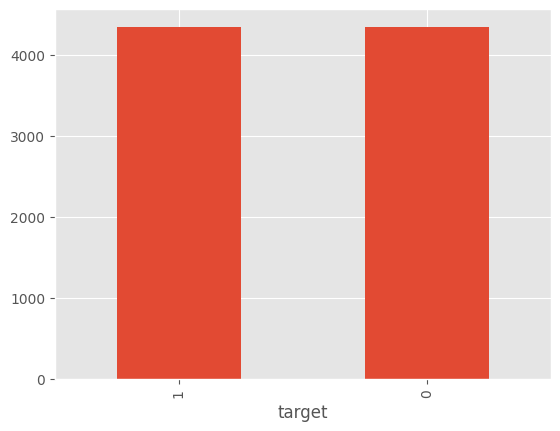

In [59]:
y_oversampled.value_counts().plot(kind = "bar")
# Hence balanced

In [60]:
# taking a glimpse
X_oversampled.head(5)

,keyword,location,text
0,0,0,deed reason earthquak may allah forgiv us
1,0,0,forest fire near la rong sask canada
2,0,0,resid ask ishelt place notifi offic no evacu s...
3,0,0,peopl receiv wildfir evacu order california
4,0,0,got sent photo rubi alaska smoke wildfir pour ...


In [61]:
# taking another glimpse
y_oversampled.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [62]:
# we are using tf-idf vectorizer
# here we are using one-gram and tri-gram as our features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 3))
X= vectorizer.fit_transform(X_oversampled["text"].values.ravel())

In [63]:
# feature engineered train data
X.shape

(8684, 95079)

In [64]:
y = y_oversampled

In [65]:
# target column
y.shape

(8684,)

In [66]:
# checking if the training data is a sparse matrix
type(X)

scipy.sparse._csr.csr_matrix

Now let's apply T-sne to get an intuition of how the data is scattered in 8684 dimensions. We will make the 8684 dimension data to 2 dimension data to get an intuition of how they are scattered in the high dimension space. T-sne takes the points which are in the same neighborhood and embed them to the low dimensional space.

In [67]:
# Dimensionality reduction
from sklearn.manifold import TSNE
def show_Tsne(perplexity = None, x = None, y = None):    
    X_embedded = TSNE(n_components=2, perplexity=perplexity,n_iter=1500,n_jobs=-1).fit_transform(X)
    embedded = pd.DataFrame(X_embedded)
    embedded.columns = ["f1", "f2"]
    embedded["class"] = y
    def change(x):
        if x == 1:
            return "Disaster"
        else:
            return "Normal"

    embedded["class"] = embedded["class"].apply(change)
    plt.figure(figsize = (12, 8))
    sns.scatterplot(x="f1", y="f2", hue="class", data = embedded)

In [70]:
# Convert sparse matrix to dense matrix
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, init="random", random_state=42)
X_tsne = tsne.fit_transform(X)  # X remains sparse

Here we can see the vectors regarding **normal tweets** are forming a cluster in 2 dim and the other class is a bit more scattered but some small clusters are being formed.

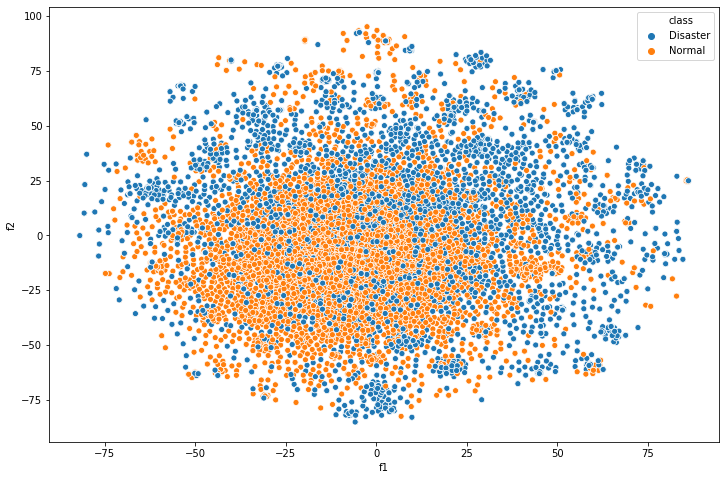

In [ ]:
show_Tsne(perplexity= 20, x = X, y = y)

The dataset might be almost separable in the high dimensional space so we will apply **logistic regression** as it works pretty good with high dimensional datasets.

In [73]:
# Splitting the dataset into train and test, we are using 20% data for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [74]:
# the sparse matrix which represents the text data
type(X_train)

scipy.sparse._csr.csr_matrix

# Modelling

In [75]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


C_vals = [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]

for num in C_vals:
    clf = LogisticRegression(C=num, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5050,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    f1 = f1_score(y_test, predicted)
    print(f"F1 score = {f1}")
    print("C value = {}".format(num))
    print("Train Accuracy = {}%".format(clf.score(X_train, y_train)*100))
    print("Test Accuracy = {}%".format(clf.score(X_test, y_test)*100))
    print(70*"=")

F1 score = 0.0
C value = 0.0001
Train Accuracy = 50.15114437886857%
Test Accuracy = 49.395509499136445%
F1 score = 0.16684045881126172
C value = 0.001
Train Accuracy = 55.57794731538793%
Test Accuracy = 54.00115141047783%
F1 score = 0.6440422322775264
C value = 0.01
Train Accuracy = 80.1928890168418%
Test Accuracy = 72.82671272308579%
F1 score = 0.7716535433070866
C value = 0.1
Train Accuracy = 88.15315963725348%
Test Accuracy = 79.96545768566494%
F1 score = 0.8132271892222903
C value = 1
Train Accuracy = 94.76032819922268%
Test Accuracy = 82.44099021301093%
F1 score = 0.8329355608591885
C value = 10
Train Accuracy = 98.2870303728228%
Test Accuracy = 83.88025331030512%
F1 score = 0.8374851720047449
C value = 100
Train Accuracy = 98.5317403195624%
Test Accuracy = 84.22567645365572%
F1 score = 0.8260869565217391
C value = 1000
Train Accuracy = 98.56052972506117%
Test Accuracy = 82.95912492803684%
F1 score = 0.8270588235294117
C value = 10000
Train Accuracy = 98.54613502231179%
Test Accur

In [76]:
# 10 is the best hyperparameter
clf = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5050,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

clf.fit(X_train, y_train)
print(f"F1 score = {f1}")
print("C value = {}".format(num))
print("Train Accuracy = {}%".format(clf.score(X_train, y_train)*100))
print("Test Accuracy = {}%".format(clf.score(X_test, y_test)*100))

F1 score = 0.8270588235294117
C value = 10000
Train Accuracy = 98.2870303728228%
Test Accuracy = 83.88025331030512%


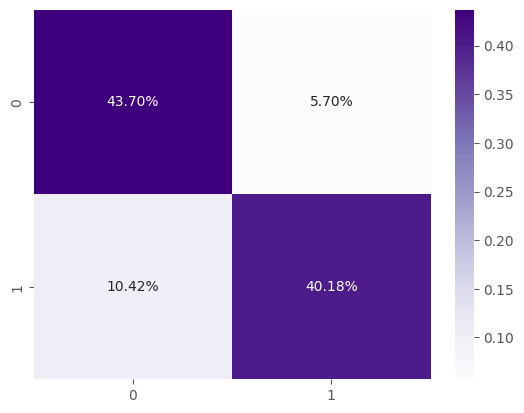

In [77]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples');

In [78]:
# saving the model
from joblib import dump

# saving the model
dump(clf, "Log-Reg-10.pkl") 

['Log-Reg-10.pkl']

In [95]:
# tesing 
text = ["""

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all

"""]
feature_representation = vectorizer.transform(text).toarray()
if clf.predict(feature_representation) == 1:
    prob = "{0:.2f}".format(clf.predict_proba(feature_representation)[0][1]*100)
    print("Disaster tweet! {}%".format(prob))
else:
    prob = "{0:.2f}".format(clf.predict_proba(feature_representation)[0][0]*100)
    print("Normal tweet! {}%".format(prob))

Normal tweet! 50.74%


# Testing our model on text data

In [82]:
# loading the test data
test = pd.read_csv("test.csv")
test.drop(["keyword", "location", "id"], axis = 1, inplace = True)

In [83]:
# peaking into the data
test.head(5)

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [84]:
# we need to preprocess the test data as well

count = 0
for sentance in tqdm(test['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(ps.stem(e.lower()) for e in sentance.split() if e.lower() not in stopwords)
    sentance.replace("#", "").replace("_", " ")
    test["text"][count] = sentance.strip()
    count += 1
    

  0%|          | 0/3263 [00:00<?, ?it/s]

In [85]:
test.tail(10)

,text
3253,malaysian pm confirm debri miss flight
3254,offici alabama home quarantin possibl ebola ca...
3255,see old pkk suicid bomber deton bomb turkey ar...
3256,confer attende blue line airport derail pleas ...
3257,death toll suicid car bomb ypg posit villag ra...
3258,earthquak safeti lo angel safeti fasten xrwn
3259,storm ri wors last hurrican hardest hit yard l...
3260,green line derail chicago
3261,meg issu hazard weather outlook hwo
3262,cityofcalgari activ municip emerg plan yycstorm


In [86]:
test_input = test["text"].values
print(X_test)

  (0, 67816)	0.16563800398784306
  (0, 28663)	0.17069497594785152
  (0, 57450)	0.0864569834031319
  (0, 30640)	0.16641346058693615
  (0, 44397)	0.11794472266531975
  (0, 57945)	0.20859825426989598
  (0, 62159)	0.2131928214950144
  (0, 5565)	0.23628366955148702
  (0, 4203)	0.16208277379384495
  (0, 94233)	0.2131928214950144
  (0, 62162)	0.23628366955148702
  (0, 5566)	0.23628366955148702
  (0, 4226)	0.2131928214950144
  (0, 44455)	0.2131928214950144
  (0, 30641)	0.2131928214950144
  (0, 28694)	0.2131928214950144
  (0, 94234)	0.2131928214950144
  (0, 62163)	0.23628366955148702
  (0, 5567)	0.23628366955148702
  (0, 4227)	0.2131928214950144
  (0, 57947)	0.2131928214950144
  (0, 44456)	0.2131928214950144
  (0, 30642)	0.2131928214950144
  (0, 28695)	0.2131928214950144
  (1, 41165)	0.20074343179497853
  :	:
  (1736, 54768)	0.17718262278181443
  (1736, 42851)	0.17409849015224932
  (1736, 82156)	0.1846666754836135
  (1736, 54010)	0.1816117010637025
  (1736, 61392)	0.18811264928023663
  (1736, 3

In [94]:
# applying the same TF-IDF
X_test = vectorizer.transform(test_input).toarray()
#save the vectorizer
dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [88]:

X_test.shape

(3263, 95079)

In [89]:
predicted = []
for i in clf.predict(X_test):
    predicted.append(i)

In [90]:
new = pd.read_csv("test.csv")
new.drop(["keyword", "location", "id"], axis = 1, inplace = True)
new["preprocessed_test"] = test.text
new["predicted"] = predicted


In [91]:
new.head(70)

,text,preprocessed_test,predicted
0,Just happened a terrible car crash,happen terribl car crash,1
1,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon,1
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond gees flee across street ...,1
3,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir,1
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,1
...,...,...,...
65,Horrible Accident Man Died In Wings of Airpla...,horribl accid man die wing,1
66,@god if an accident were to happen on this air...,accid happen airplan idc rest luggag complet d...,0
67,Horrible Accident Man Died In Wings of Airplan...,horribl accid man die wing airplan,1
68,#UPDATE: Picture from the Penn Twp. airplane a...,updat pictur penn twp airplan accid,1


In [93]:
# saving the dataframe as csv
new.to_csv("predicted_test.csv") 